<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [209]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [210]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [211]:
import pyupbit

In [212]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-sol", interval="minute60")
df

,open,high,low,close,volume,value
2022-09-08 05:00:00,44660.0,45590.0,44650.0,45400.0,31114.796113,1.411111e+09
2022-09-08 06:00:00,45310.0,45600.0,45020.0,45260.0,28187.415794,1.277402e+09
2022-09-08 07:00:00,45200.0,45470.0,45200.0,45430.0,14491.283572,6.572086e+08
2022-09-08 08:00:00,45420.0,45680.0,45250.0,45340.0,26362.528701,1.197864e+09
2022-09-08 09:00:00,45340.0,45610.0,45100.0,45330.0,41824.664604,1.896113e+09
...,...,...,...,...,...,...
2022-09-16 08:00:00,46520.0,46620.0,46170.0,46480.0,21312.987849,9.899419e+08
2022-09-16 09:00:00,46480.0,46660.0,45750.0,46620.0,50341.497109,2.328530e+09
2022-09-16 10:00:00,46620.0,46620.0,46210.0,46300.0,19948.981030,9.270371e+08
2022-09-16 11:00:00,46290.0,46350.0,45780.0,46040.0,30432.726736,1.399680e+09


In [213]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-09-08 05:00:00,45400.0
1,2022-09-08 06:00:00,45260.0
2,2022-09-08 07:00:00,45430.0
3,2022-09-08 08:00:00,45340.0
4,2022-09-08 09:00:00,45330.0
...,...,...
195,2022-09-16 08:00:00,46480.0
196,2022-09-16 09:00:00,46620.0
197,2022-09-16 10:00:00,46300.0
198,2022-09-16 11:00:00,46040.0


In [214]:
#prophet 불러옴
from fbprophet import Prophet

In [215]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [216]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=25, freq='H')
forecast = model.predict(future)

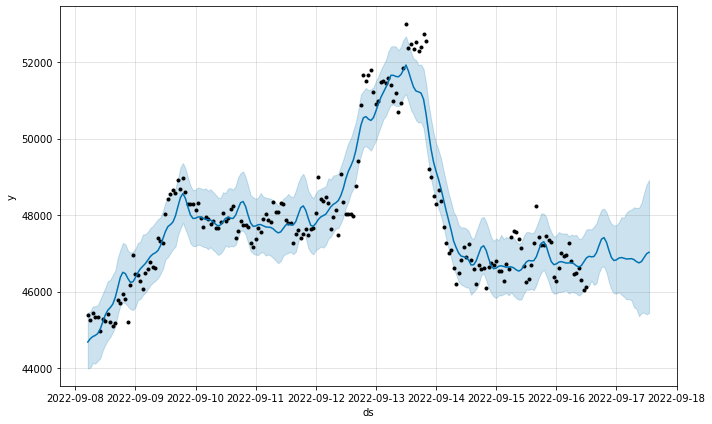

In [217]:
#그래프1
fig1 = model.plot(forecast)

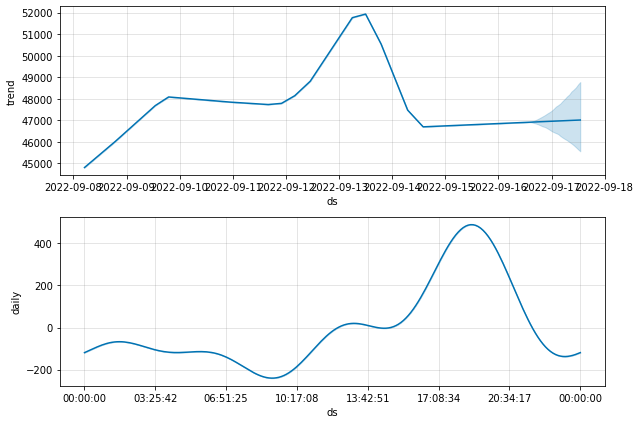

In [218]:
 #그래프2
fig2 = model.plot_components(forecast)